In [1]:
import numpy as np
import scipy.stats
import statistics
import matplotlib.pyplot as plt
import matplotlib
from sympy import *

In [2]:
b, q, r, p_00, p_01, p_10, p_11 = symbols('b q r p_00 p_01 p_10 p_11')
T = symbols('T')
A = Matrix([[0, 1], [0, 0]])
B = Matrix([[0], [b]])
C = Matrix([[1, 0]])
L = Matrix([[0], [1]])
P = Matrix([[p_00, p_01], [p_10, p_11]])

In [3]:
X1 = A*P+P*A.T-P*C.T*(r**(-1))*C*P+L*q*L.T
X1

Matrix([
[-p_00**2/r + p_01 + p_10, -p_00*p_01/r + p_11],
[     -p_00*p_10/r + p_11,    -p_01*p_10/r + q]])

In [4]:
X2 = solve(X1, (p_00, p_01, p_10, p_11))
X2

[(0, -sqrt(-q*r), sqrt(-q*r), 0),
 (0, sqrt(-q*r), -sqrt(-q*r), 0),
 (-sqrt(2)*(q**3*r)**(3/4)/q**2,
  sqrt(q**3*r)/q,
  sqrt(q**3*r)/q,
  -sqrt(2)*(q**3*r)**(1/4)),
 (sqrt(2)*(q**3*r)**(3/4)/q**2,
  sqrt(q**3*r)/q,
  sqrt(q**3*r)/q,
  sqrt(2)*(q**3*r)**(1/4)),
 (-sqrt(2)*I*(q**3*r)**(3/4)/q**2,
  -sqrt(q**3*r)/q,
  -sqrt(q**3*r)/q,
  sqrt(2)*I*(q**3*r)**(1/4)),
 (sqrt(2)*I*(q**3*r)**(3/4)/q**2,
  -sqrt(q**3*r)/q,
  -sqrt(q**3*r)/q,
  -sqrt(2)*I*(q**3*r)**(1/4))]

$P=P^T \ge 0$

In [5]:
X3 = []
for x in X2:
 X3.append([x[0], x[0]*x[3]-x[1]*x[2]])
Matrix(X3)

Matrix([
[                              0,          -q*r],
[                              0,          -q*r],
[  -sqrt(2)*(q**3*r)**(3/4)/q**2, (q**3*r)/q**2],
[   sqrt(2)*(q**3*r)**(3/4)/q**2, (q**3*r)/q**2],
[-sqrt(2)*I*(q**3*r)**(3/4)/q**2, (q**3*r)/q**2],
[ sqrt(2)*I*(q**3*r)**(3/4)/q**2, (q**3*r)/q**2]])

In [6]:
P = Matrix([[X2[3][0], X2[3][1]],[X2[3][2],X2[3][3]]])
P

Matrix([
[sqrt(2)*(q**3*r)**(3/4)/q**2,          sqrt(q**3*r)/q],
[              sqrt(q**3*r)/q, sqrt(2)*(q**3*r)**(1/4)]])

In [7]:
K = P*C.T*r**(-1)
K

Matrix([
[sqrt(2)*(q**3*r)**(3/4)/(q**2*r)],
[              sqrt(q**3*r)/(q*r)]])

$\frac{x_{t+1}-x_t}{T} = Ax_t+Bu_t+K(y_t-Cx_t)$

$x_{t+1} = (AT-KCT+1)x_t+KTy_t+BTu_t$

$M_1 = (AT-KCT+1)$

$M_2 = KT$

$M_3 = BT$

In [8]:
M_1 = A*T-K*C*T+eye(2)
M_1

Matrix([
[-sqrt(2)*T*(q**3*r)**(3/4)/(q**2*r) + 1, T],
[                  -T*sqrt(q**3*r)/(q*r), 1]])

In [9]:
M_2 = K*T
M_2

Matrix([
[sqrt(2)*T*(q**3*r)**(3/4)/(q**2*r)],
[              T*sqrt(q**3*r)/(q*r)]])

In [10]:
M_3 = B*T
M_3

Matrix([
[  0],
[T*b]])

In [11]:
T_v = 0.05
q_v = 1
r_v = 1
b_v = 3.25

In [12]:
M_1v = M_1.subs(T, T_v).subs(q, q_v).subs(r, r_v).evalf()
M_1v

Matrix([
[0.929289321881345, 0.05],
[            -0.05,  1.0]])

In [13]:
M_2v = M_2.subs(T, T_v).subs(q, q_v).subs(r, r_v).evalf()
M_2v

Matrix([
[0.0707106781186548],
[              0.05]])

In [14]:
M_3v = M_3.subs(T, T_v).subs(b, b_v).evalf()
M_3v

Matrix([
[     0],
[0.1625]])

In [15]:
x_v = np.array([152, 161, 163, 167, 169, 176, 175, 177, 183, 190, 189, 191, 195, 208, 207, 207, 215, 212, 214, 225, 216, 222, 219, 214, 219, 222, 219, 217, 215, 217, 208, 208, 207, 202, 193, 193, 191, 186, 186, 184, 174, 172, 168, 166, 158, 157, 148, 146, 136, 134, 133, 129, 128, 126, 126, 124, 127, 128, 129, 130, 138, 137, 141, 144, 148, 153, 157, 163, 171, 172, 176, 179, 182, 191, 193, 193, 202, 211, 209, 219, 216, 221, 216, 222, 226, 226, 222, 230, 229, 229, 224, 223, 223, 219, 213, 219, 214, 209, 203, 202, 191, 189, 188, 179, 176, 169, 163, 163, 151, 150, 145, 136, 135, 132, 129, 126, 125, 125, 121, 120, 122, 122, 123, 124, 124, 124, 129, 127, 133, 136, 135, 140, 146, 150, 154, 158, 166, 168, 173, 175, 185, 185, 188, 190, 197, 199, 204, 207, 208, 206, 205, 214, 214, 216, 219, 222, 223, 219, 220, 222, 219, 228, 219, 216, 213, 216, 214, 210, 210, 206, 201, 188, 180, 171, 163, 159, 149, 148, 144, 139, 132, 131, 126, 124, 122, 121, 121, 119, 118, 117, 117, 117, 120, 119, 117, 118, 120, 118, 119, 121, 119, 122, 124, 123, 125, 126, 128, 134, 134, 136, 142, 140, 150, 151, 157, 162, 165, 167, 173, 176, 180, 182, 189, 190, 192, 203, 202, 206, 207, 214, 214, 221, 217, 213, 225, 221, 227, 225, 218, 221, 220, 218, 208, 209, 207, 205, 201, 197, 193, 188, 180, 179, 175, 169, 170, 161, 159, 153, 147, 140, 140, 134, 132, 132, 128, 126, 126, 124, 124, 123, 125, 127, 125, 132, 130, 135, 135, 138, 141, 146, 147, 149, 157, 159, 162, 162, 165, 172, 175, 180, 181, 184, 186, 193, 199, 206, 204, 212, 207, 208, 213, 214, 224, 216, 220, 218, 220, 225, 222, 217, 214, 214, 214, 212, 219, 214, 217, 225, 217, 197, 193, 184, 179, 175, 166, 157, 151, 145, 138, 134, 129, 123, 123, 117, 118, 117, 114, 113, 115, 113, 116, 117, 118, 118, 120, 122, 121, 125, 126, 129, 133, 137, 140, 146, 147, 156, 159, 164, 174, 179, 185, 188, 185, 185, 190, 190, 196, 194, 205, 203, 206, 211, 210, 217, 217, 212, 215, 213, 218, 221, 223, 215, 213, 215, 212, 209, 212, 208, 202, 198, 191, 187, 185, 182, 175, 169, 164, 161, 157, 150, 146, 145, 141, 136, 135, 134, 132, 129, 129, 130, 129, 126, 129, 128, 134, 131, 135, 138, 143, 147, 149, 152, 157, 158, 162, 163, 168, 174, 175, 181, 184, 191, 193, 196, 199, 205, 208, 209, 215, 214, 214, 214, 218, 225, 216, 217, 219, 214, 219, 211, 219, 214, 212, 213, 207, 205, 199, 200, 190, 187, 181, 180, 176, 171, 166, 160, 154, 150, 146, 140, 140, 135, 132, 129, 128, 129, 126, 126, 124, 125, 125, 127, 130, 130, 135, 135, 139, 141, 145, 154, 151, 161, 159, 163, 168, 173, 174, 176, 184, 189, 191, 198, 197, 206, 202, 203, 221, 210, 214, 214, 219, 219, 221, 225, 217, 222, 224, 221, 214, 213, 214, 214, 205, 204, 196, 197, 192, 188, 171, 173, 168, 166, 157, 150, 148, 141, 138, 134, 132, 126, 129, 125, 123, 127, 123, 123, 128, 131, 131, 134, 137, 143, 144, 149, 154, 157, 163, 163, 167, 178, 180, 177, 190, 193, 197, 197, 197, 206, 206, 216, 214, 214, 218, 220, 223, 215, 214, 219, 219, 222, 219, 214, 208, 214, 203, 206, 205, 196, 202, 196, 185, 187, 175, 174, 171, 163, 157, 156, 154, 149, 146, 141, 136, 135, 133, 129, 129, 129, 127, 127, 126, 128, 131, 129, 129, 136, 133, 136, 144, 145, 147, 152, 153, 162, 163, 166, 167, 174, 181, 185, 184, 194, 196, 200, 207, 206, 211, 210, 211, 220, 213, 220, 225, 215, 225, 225, 225, 218, 220, 216, 209, 208, 210, 206, 200, 197, 190, 187, 184, 181, 171, 168, 164, 154, 151, 143, 139, 139, 134, 133, 127, 128, 123, 123, 123, 126, 126, 126, 129, 131, 134])
u_v = np.array([42, 51, 53, 57, 59, 66, 65, 67, 73, 80, 79, 81, 85, 98, 97, 97, 105, 102, 104, 115, 106, 112, 109, 104, 109, 112, 109, 107, 105, 107, 98, 98, 97, 92, 83, 83, 81, 76, 76, 74, 64, 62, 58, 56, 48, 47, 38, 36, 26, 24, 23, 19, 18, 16, 16, 14, 17, 18, 19, 20, 28, 27, 31, 34, 38, 43, 47, 53, 61, 62, 66, 69, 72, 81, 83, 83, 92, 101, 99, 109, 106, 111, 106, 112, 116, 116, 112, 120, 119, 119, 114, 113, 113, 109, 103, 109, 104, 99, 93, 92, 81, 79, 78, 69, 66, 59, 53, 53, 41, 40, 35, 26, 25, 22, 19, 16, 15, 15, 11, 10, 12, 12, 13, 14, 14, 14, 19, 17, 23, 26, 25, 30, 36, 40, 44, 48, 56, 58, 63, 65, 75, 75, 78, 80, 87, 89, 94, 97, 98, 96, 95, 104, 104, 106, 109, 112, 113, 109, 110, 112, 109, 118, 109, 106, 103, 106, 104, 100, 100, 96, 91, 78, 70, 61, 53, 49, 39, 38, 34, 29, 22, 21, 16, 14, 12, 11, 11, 9, 8, 7, 7, 7, 10, 9, 7, 8, 10, 8, 9, 11, 9, 12, 14, 13, 15, 16, 18, 24, 24, 26, 32, 30, 40, 41, 47, 52, 55, 57, 63, 66, 70, 72, 79, 80, 82, 93, 92, 96, 97, 104, 104, 111, 107, 103, 115, 111, 117, 115, 108, 111, 110, 108, 98, 99, 97, 95, 91, 87, 83, 78, 70, 69, 65, 59, 60, 51, 49, 43, 37, 30, 30, 24, 22, 22, 18, 16, 16, 14, 14, 13, 15, 17, 15, 22, 20, 25, 25, 28, 31, 36, 37, 39, 47, 49, 52, 52, 55, 62, 65, 70, 71, 74, 76, 83, 89, 96, 94, 102, 97, 98, 103, 104, 114, 106, 110, 108, 110, 115, 112, 107, 104, 104, 104, 102, 109, 104, 107, 115, 107, 87, 83, 74, 69, 65, 56, 47, 41, 35, 28, 24, 19, 13, 13, 7, 8, 7, 4, 3, 5, 3, 6, 7, 8, 8, 10, 12, 11, 15, 16, 19, 23, 27, 30, 36, 37, 46, 49, 54, 64, 69, 75, 78, 75, 75, 80, 80, 86, 84, 95, 93, 96, 101, 100, 107, 107, 102, 105, 103, 108, 111, 113, 105, 103, 105, 102, 99, 102, 98, 92, 88, 81, 77, 75, 72, 65, 59, 54, 51, 47, 40, 36, 35, 31, 26, 25, 24, 22, 19, 19, 20, 19, 16, 19, 18, 24, 21, 25, 28, 33, 37, 39, 42, 47, 48, 52, 53, 58, 64, 65, 71, 74, 81, 83, 86, 89, 95, 98, 99, 105, 104, 104, 104, 108, 115, 106, 107, 109, 104, 109, 101, 109, 104, 102, 103, 97, 95, 89, 90, 80, 77, 71, 70, 66, 61, 56, 50, 44, 40, 36, 30, 30, 25, 22, 19, 18, 19, 16, 16, 14, 15, 15, 17, 20, 20, 25, 25, 29, 31, 35, 44, 41, 51, 49, 53, 58, 63, 64, 66, 74, 79, 81, 88, 87, 96, 92, 93, 111, 100, 104, 104, 109, 109, 111, 115, 107, 112, 114, 111, 104, 103, 104, 104, 95, 94, 86, 87, 82, 78, 61, 63, 58, 56, 47, 40, 38, 31, 28, 24, 22, 16, 19, 15, 13, 17, 13, 13, 18, 21, 21, 24, 27, 33, 34, 39, 44, 47, 53, 53, 57, 68, 70, 67, 80, 83, 87, 87, 87, 96, 96, 106, 104, 104, 108, 110, 113, 105, 104, 109, 109, 112, 109, 104, 98, 104, 93, 96, 95, 86, 92, 86, 75, 77, 65, 64, 61, 53, 47, 46, 44, 39, 36, 31, 26, 25, 23, 19, 19, 19, 17, 17, 16, 18, 21, 19, 19, 26, 23, 26, 34, 35, 37, 42, 43, 52, 53, 56, 57, 64, 71, 75, 74, 84, 86, 90, 97, 96, 101, 100, 101, 110, 103, 110, 115, 105, 115, 115, 115, 108, 110, 106, 99, 98, 100, 96, 90, 87, 80, 77, 74, 71, 61, 58, 54, 44, 41, 33, 29, 29, 24, 23, 17, 18, 13, 13, 13, 16, 16, 16, 19, 21, 24])
N = len(x_v)
t_v = np.linspace(start=0, stop=(N-1)*T_v, num=N)

In [16]:
xe = np.zeros((N, 2))
for i in range(N-1):
    xe[i+1] = np.dot(M_1v, xe[i].transpose()) + np.dot(M_2v, x_v[i]).transpose() + np.dot(M_3v, 65-u_v[i]).transpose()

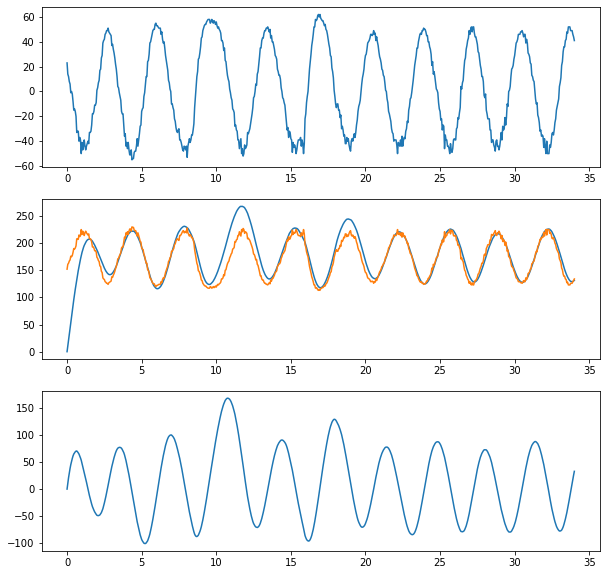

In [17]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.plot(t_v, 65-u_v)
fig.add_subplot(3, 1, 2)
plt.plot(t_v, xe[:,0])
plt.plot(t_v, x_v)
fig.add_subplot(3, 1, 3)
plt.plot(t_v, xe[:,1])

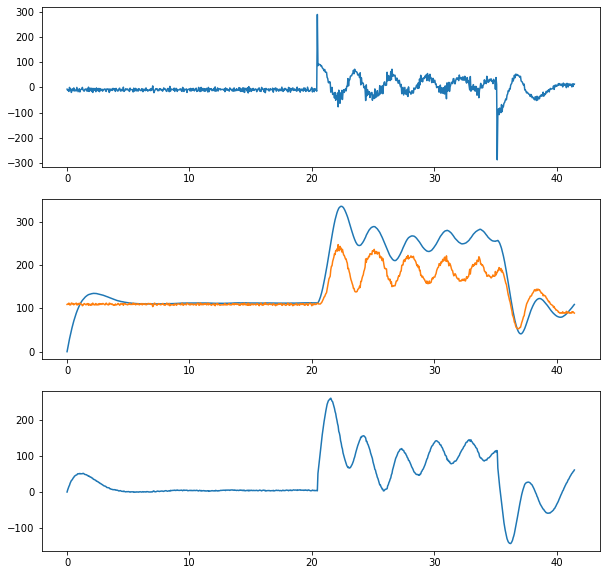

In [21]:
x_v1 = np.array([109, 110, 110, 112, 108, 109, 108, 112, 112, 110, 111, 108, 110, 110, 111, 112, 108, 108, 111, 111, 109, 112, 111, 110, 109, 106, 107, 109, 111, 110, 109, 108, 110, 109, 111, 107, 110, 108, 109, 107, 110, 108, 112, 110, 108, 109, 108, 111, 108, 109, 108, 110, 108, 111, 109, 110, 110, 109, 111, 111, 110, 109, 108, 110, 112, 110, 109, 108, 108, 112, 110, 111, 110, 109, 110, 108, 107, 108, 107, 110, 108, 108, 109, 111, 111, 109, 107, 109, 111, 110, 110, 111, 107, 110, 111, 111, 109, 109, 109, 108, 109, 110, 112, 109, 109, 109, 109, 109, 112, 109, 111, 110, 108, 110, 109, 109, 111, 109, 108, 109, 110, 111, 109, 108, 111, 110, 109, 110, 111, 108, 109, 109, 111, 111, 111, 110, 111, 109, 110, 109, 104, 106, 111, 112, 111, 109, 108, 107, 109, 110, 111, 109, 109, 108, 109, 109, 111, 111, 108, 108, 107, 108, 110, 112, 110, 108, 108, 111, 106, 109, 108, 108, 108, 108, 109, 107, 110, 110, 108, 107, 110, 110, 110, 110, 109, 109, 108, 110, 112, 108, 107, 110, 109, 109, 109, 108, 112, 111, 110, 109, 108, 110, 108, 110, 109, 110, 108, 108, 110, 109, 109, 107, 110, 111, 112, 108, 107, 110, 112, 108, 110, 110, 108, 109, 111, 109, 111, 110, 108, 109, 112, 108, 111, 109, 109, 108, 107, 109, 109, 110, 108, 110, 106, 109, 110, 111, 108, 110, 109, 108, 107, 108, 108, 108, 108, 108, 109, 108, 111, 108, 108, 109, 108, 109, 109, 111, 108, 108, 108, 108, 110, 109, 111, 108, 110, 110, 111, 109, 109, 110, 110, 107, 109, 107, 110, 109, 111, 108, 111, 108, 112, 110, 108, 108, 110, 107, 112, 107, 110, 108, 107, 110, 109, 110, 108, 109, 110, 109, 108, 108, 111, 110, 110, 108, 106, 109, 110, 112, 108, 108, 107, 108, 111, 109, 113, 110, 109, 109, 109, 108, 110, 111, 109, 109, 109, 109, 107, 111, 110, 108, 108, 106, 109, 109, 108, 109, 111, 110, 109, 110, 111, 107, 107, 110, 109, 110, 108, 107, 107, 109, 109, 112, 108, 109, 107, 111, 109, 110, 108, 106, 108, 109, 108, 109, 109, 111, 107, 109, 109, 108, 107, 111, 110, 109, 110, 109, 111, 108, 109, 107, 110, 110, 111, 107, 107, 110, 111, 112, 111, 109, 106, 110, 109, 108, 111, 109, 109, 109, 111, 111, 112, 110, 110, 110, 110, 112, 113, 116, 119, 122, 126, 127, 131, 134, 136, 144, 151, 161, 168, 171, 174, 189, 197, 198, 208, 213, 218, 226, 224, 233, 233, 237, 232, 247, 235, 233, 243, 236, 239, 230, 236, 230, 223, 222, 218, 214, 214, 208, 204, 191, 192, 185, 180, 172, 166, 162, 157, 153, 146, 146, 140, 138, 138, 138, 139, 143, 145, 146, 151, 148, 162, 162, 169, 174, 177, 185, 189, 195, 214, 206, 215, 213, 216, 220, 219, 226, 225, 226, 224, 233, 232, 232, 236, 226, 231, 228, 231, 225, 227, 229, 229, 217, 220, 216, 218, 210, 215, 208, 199, 192, 192, 191, 191, 174, 174, 167, 168, 164, 167, 157, 161, 150, 152, 151, 152, 152, 152, 158, 163, 163, 165, 171, 175, 174, 179, 185, 186, 199, 200, 200, 210, 212, 208, 214, 214, 219, 215, 222, 214, 216, 217, 218, 221, 219, 217, 219, 220, 214, 212, 210, 207, 202, 198, 200, 194, 197, 187, 188, 176, 176, 172, 174, 171, 168, 167, 163, 162, 158, 163, 157, 158, 157, 163, 158, 159, 160, 167, 170, 168, 172, 172, 172, 177, 180, 187, 191, 194, 195, 203, 203, 199, 207, 205, 208, 213, 209, 214, 218, 210, 209, 221, 208, 210, 207, 198, 204, 202, 198, 192, 188, 187, 180, 175, 177, 180, 178, 174, 170, 169, 167, 169, 163, 163, 164, 163, 165, 167, 164, 166, 168, 164, 163, 168, 173, 169, 172, 173, 180, 190, 179, 191, 193, 197, 201, 197, 201, 200, 205, 202, 201, 211, 210, 208, 219, 216, 211, 202, 202, 199, 200, 197, 194, 186, 185, 182, 183, 174, 174, 176, 177, 174, 174, 172, 170, 172, 173, 177, 174, 174, 174, 185, 177, 181, 183, 188, 187, 194, 190, 188, 192, 184, 188, 183, 181, 175, 170, 164, 158, 155, 147, 140, 131, 126, 119, 115, 107, 100, 94, 84, 81, 76, 68, 66, 60, 56, 55, 53, 53, 53, 54, 56, 56, 62, 67, 71, 76, 81, 83, 92, 98, 104, 110, 113, 116, 119, 122, 124, 128, 128, 129, 133, 135, 137, 140, 143, 141, 140, 144, 141, 144, 144, 142, 143, 140, 138, 135, 135, 134, 129, 131, 129, 129, 128, 124, 123, 120, 118, 115, 116, 113, 110, 109, 108, 107, 106, 102, 104, 100, 99, 96, 96, 95, 94, 91, 91, 89, 89, 90, 89, 89, 92, 89, 90, 89, 90, 89, 93, 90, 89, 92, 90, 89, 90, 89, 89, 92, 90, 92, 90, 89])
u_v1 = np.array([-7, -12, -10, -16, 0, -11, -6, -20, -12, -6, -13, -2, -14, -10, -13, -14, 0, -8, -17, -11, -5, -18, -9, -8, -7, 0, -9, -13, -15, -8, -7, -6, -14, -7, -15, 1, -16, -4, -11, -3, -16, -4, -20, -6, -4, -11, -6, -17, -2, -11, -6, -14, -4, -17, -5, -12, -10, -7, -15, -11, -8, -7, -6, -14, -16, -6, -7, -6, -8, -20, -6, -13, -8, -7, -12, -4, -5, -10, -5, -16, -4, -8, -11, -15, -11, -5, -3, -13, -15, -8, -10, -13, 1, -16, -13, -11, -5, -9, -9, -6, -11, -12, -16, -3, -9, -9, -9, -9, -18, -3, -15, -8, -4, -14, -7, -9, -15, -5, -6, -11, -12, -13, -5, -6, -17, -8, -7, -12, -13, -2, -11, -9, -15, -11, -11, -8, -13, -5, -12, -7, 6, -10, -21, -14, -9, -5, -6, -5, -13, -12, -13, -5, -9, -6, -11, -9, -15, -11, -2, -8, -5, -10, -14, -16, -6, -4, -8, -17, 4, -15, -6, -8, -8, -8, -11, -3, -16, -10, -4, -5, -16, -10, -10, -10, -7, -9, -6, -14, -16, 0, -5, -16, -7, -9, -9, -6, -20, -9, -8, -7, -6, -14, -4, -14, -7, -12, -4, -8, -14, -7, -9, -3, -16, -13, -14, 0, -5, -16, -16, 0, -14, -10, -4, -11, -15, -5, -15, -8, -4, -11, -18, 0, -17, -5, -9, -6, -5, -13, -9, -12, -4, -14, 2, -15, -12, -13, -2, -14, -7, -6, -5, -10, -8, -8, -8, -8, -11, -6, -17, -2, -8, -11, -6, -11, -9, -15, -2, -8, -8, -8, -14, -7, -15, -2, -14, -10, -13, -5, -9, -12, -10, -1, -13, -3, -16, -7, -15, -2, -17, -2, -20, -6, -4, -8, -14, -1, -22, 3, -16, -4, -5, -16, -7, -12, -4, -11, -12, -7, -6, -8, -17, -8, -10, -4, -2, -15, -12, -16, 0, -8, -5, -10, -17, -5, -21, -4, -7, -9, -9, -6, -14, -13, -5, -9, -9, -9, -3, -19, -8, -4, -8, -2, -15, -9, -6, -11, -15, -8, -7, -12, -13, 1, -7, -16, -7, -12, -4, -5, -7, -13, -9, -18, 0, -11, -3, -19, -5, -12, -4, -2, -12, -11, -6, -11, -9, -15, 1, -13, -9, -6, -5, -19, -8, -7, -12, -7, -15, -2, -11, -3, -16, -10, -13, 1, -7, -16, -13, -14, -9, -5, 0, -18, -7, -6, -17, -5, -9, -9, -15, 289, 86, 94, 90, 90, 90, 84, 85, 78, 75, 72, 66, 71, 61, 60, 60, 40, 35, 19, 18, 23, 20, -19, -13, 0, -28, -23, -28, -42, -20, -51, -33, -45, -22, -77, -11, -29, -63, -22, -45, -12, -48, -18, -9, -20, -10, -6, -14, 4, 4, 35, 6, 29, 30, 44, 46, 46, 53, 55, 68, 54, 72, 66, 62, 62, 59, 49, 51, 52, 39, 58, 10, 38, 17, 16, 17, -1, 3, -7, -52, 10, -33, -9, -22, -28, -17, -40, -23, -28, -20, -51, -30, -32, -44, -6, -41, -22, -37, -13, -31, -33, -29, 7, -26, -8, -22, 6, -25, 6, 19, 22, 8, 11, 9, 60, 26, 47, 30, 44, 27, 63, 31, 72, 44, 51, 46, 48, 48, 30, 27, 37, 31, 17, 17, 28, 11, 3, 12, -25, -2, 0, -30, -16, 0, -26, -14, -29, -7, -36, 2, -20, -19, -20, -27, -15, -13, -23, -22, -2, -8, -6, -1, 8, 10, -4, 18, -3, 33, 10, 48, 24, 36, 22, 35, 38, 35, 45, 40, 50, 27, 55, 40, 45, 25, 52, 39, 38, 19, 24, 36, 20, 28, 28, 13, 14, -1, 1, 0, 3, -19, -3, 9, -23, -1, -14, -23, -1, -24, -26, 6, -7, -45, 18, -14, -1, 20, -16, 2, 10, 20, 20, 15, 34, 35, 19, 14, 26, 34, 38, 33, 37, 27, 49, 37, 34, 39, 31, 29, 42, 30, 28, 44, 39, 22, 17, 39, 22, 25, 6, -10, 43, -15, 3, -5, -9, 11, -9, 2, -15, 4, 1, -31, -8, -4, -41, -10, -1, 16, -2, 7, -2, 9, 12, 30, 17, 24, 15, 44, 26, 20, 21, 32, 26, 32, 34, 24, 25, 15, 32, 26, 26, -7, 39, 11, -287, -98, -85, -108, -82, -84, -100, -68, -96, -73, -77, -63, -60, -52, -46, -49, -31, -26, -13, -16, -5, -7, 9, 14, 18, 36, 25, 34, 48, 38, 52, 52, 47, 51, 47, 47, 44, 40, 44, 26, 23, 21, 14, 9, 13, -10, -10, -16, -22, -19, -22, -25, -28, -28, -36, -28, -31, -41, -39, -41, -46, -49, -37, -38, -52, -35, -50, -44, -38, -45, -34, -34, -29, -35, -32, -19, -35, -25, -29, -26, -16, -21, -14, -14, -9, -18, -7, -4, -7, -6, -5, -4, 6, -8, 8, 3, 10, 4, 7, 8, 15, 9, 15, 11, 8, 13, 11, 2, 17, 8, 13, 8, 13, -1, 16, 13, 2, 14, 13, 8, 13, 11, 2, 14, 4, 14, 13])
N1 = len(x_v1)
t_v1 = np.linspace(start=0, stop=(N1-1)*T_v, num=N1)
xe1 = np.zeros((N1, 2))
for i in range(N1-1):
    xe1[i+1] = np.dot(M_1v, xe1[i].transpose()) + np.dot(M_2v, x_v1[i]).transpose() + np.dot(M_3v, u_v1[i]+10).transpose()
    
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 1, 1)
plt.plot(t_v1, u_v1)
fig.add_subplot(3, 1, 2)
plt.plot(t_v1, xe1[:,0])
plt.plot(t_v1, x_v1)
fig.add_subplot(3, 1, 3)
plt.plot(t_v1, xe1[:,1])

In [33]:
xe1[1] = [1,0]
xe1[1].transpose()

array([1., 0.])

In [34]:
M_1v

Matrix([
[0.929289321881345, 0.05],
[            -0.05,  1.0]])

In [35]:
np.dot(M_1v, xe1[1].transpose())

array([0.929289321881345, -0.0500000000000000], dtype=object)

In [38]:
x_v1[1]=1

In [39]:
np.dot(M_2v, x_v1[1]).transpose()

array([[0.0707106781186548, 0.0500000000000000]], dtype=object)